<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-strk", interval="minute240")
df

,open,high,low,close,volume,value
2022-10-02 14:00:00,23500.0,23550.0,23490.0,23520.0,1248.171735,2.934027e+07
2022-10-02 15:00:00,23530.0,23530.0,23520.0,23520.0,523.693383,1.231747e+07
2022-10-02 16:00:00,23520.0,23550.0,23510.0,23520.0,696.249105,1.637574e+07
2022-10-02 17:00:00,23520.0,23550.0,23500.0,23520.0,2027.926545,4.768255e+07
2022-10-02 18:00:00,23520.0,23540.0,23520.0,23520.0,584.134592,1.374255e+07
...,...,...,...,...,...,...
2022-10-10 17:00:00,23970.0,23970.0,23550.0,23760.0,59635.664095,1.415278e+09
2022-10-10 18:00:00,23760.0,23860.0,23660.0,23790.0,16947.976991,4.029192e+08
2022-10-10 19:00:00,23810.0,23920.0,23790.0,23830.0,13236.664928,3.158340e+08
2022-10-10 20:00:00,23840.0,23900.0,23770.0,23870.0,10831.280389,2.582519e+08


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-10-02 14:00:00,23520.0
1,2022-10-02 15:00:00,23520.0
2,2022-10-02 16:00:00,23520.0
3,2022-10-02 17:00:00,23520.0
4,2022-10-02 18:00:00,23520.0
...,...,...
195,2022-10-10 17:00:00,23760.0
196,2022-10-10 18:00:00,23790.0
197,2022-10-10 19:00:00,23830.0
198,2022-10-10 20:00:00,23870.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=100, freq='H')
forecast = model.predict(future)

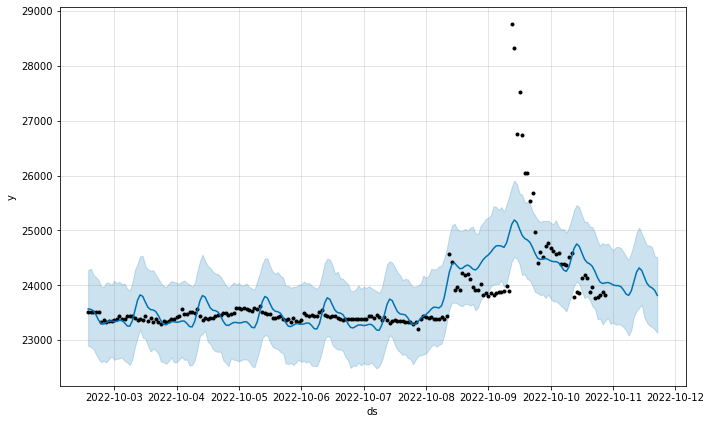

In [ ]:
#그래프1
fig1 = model.plot(forecast)

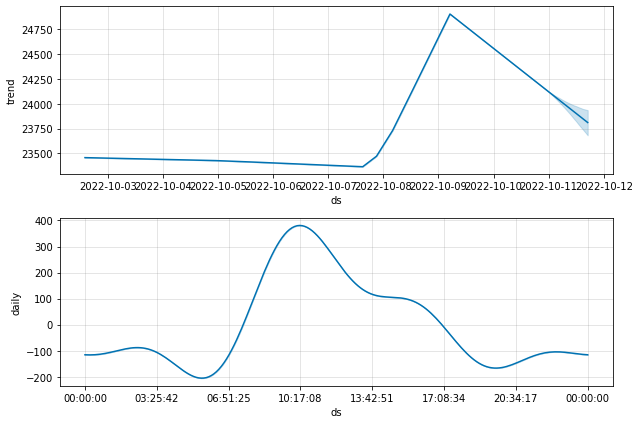

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)